In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df=pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [ ]:
from sklearn.cluster import KMeans
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42,n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


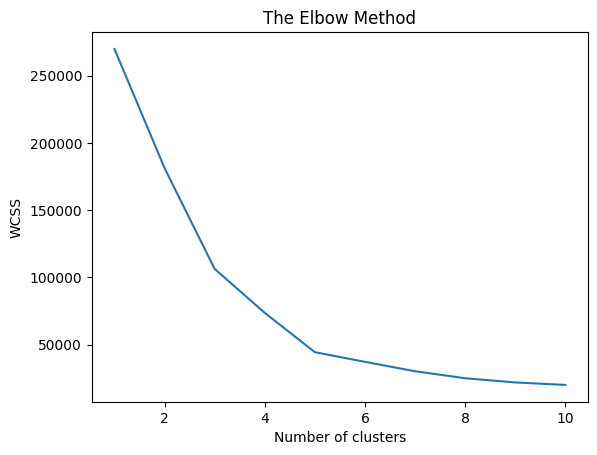

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

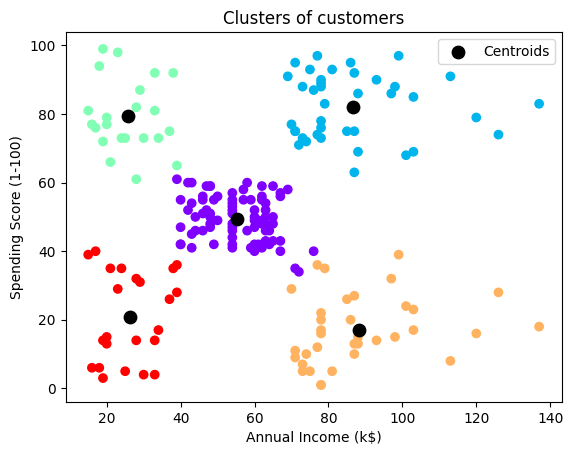

In [ ]:
from sklearn.cluster import KMeans
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42,n_init=10)
y_kmeans=kmeans.fit_predict(X)

plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=y_kmeans,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=80,c='black',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

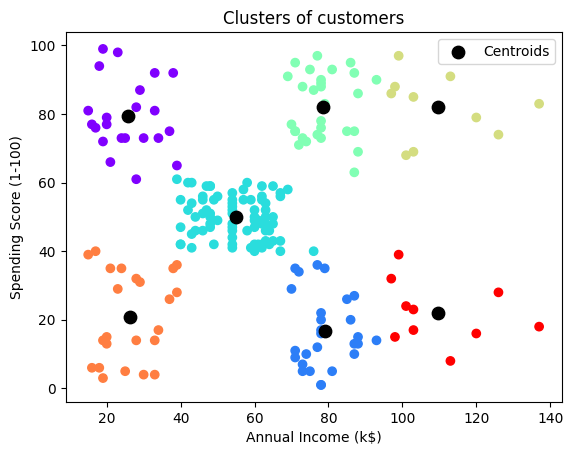

In [ ]:
from sklearn.cluster import KMeans
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans=KMeans(n_clusters=7,init='k-means++',random_state=42,n_init=10)
y_kmeans=kmeans.fit_predict(X)

plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=y_kmeans,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=80,c='black',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

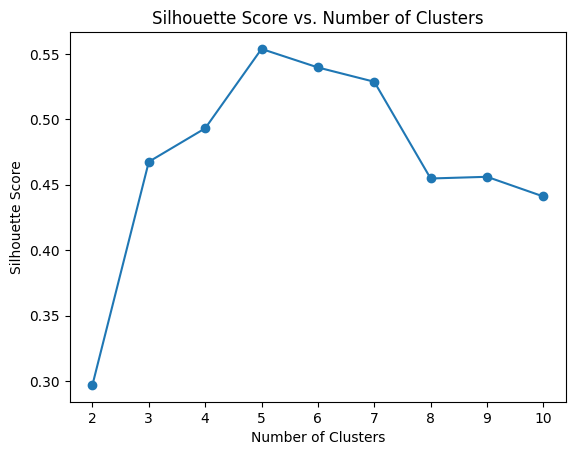

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X = df[['Annual Income (k$)','Spending Score (1-100)']]
y = df['Gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Accuracy: 0.575
Confusion Matrix:
 [[19  2]
 [15  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.90      0.69        21
           1       0.67      0.21      0.32        19

    accuracy                           0.57        40
   macro avg       0.61      0.56      0.51        40
weighted avg       0.61      0.57      0.51        40



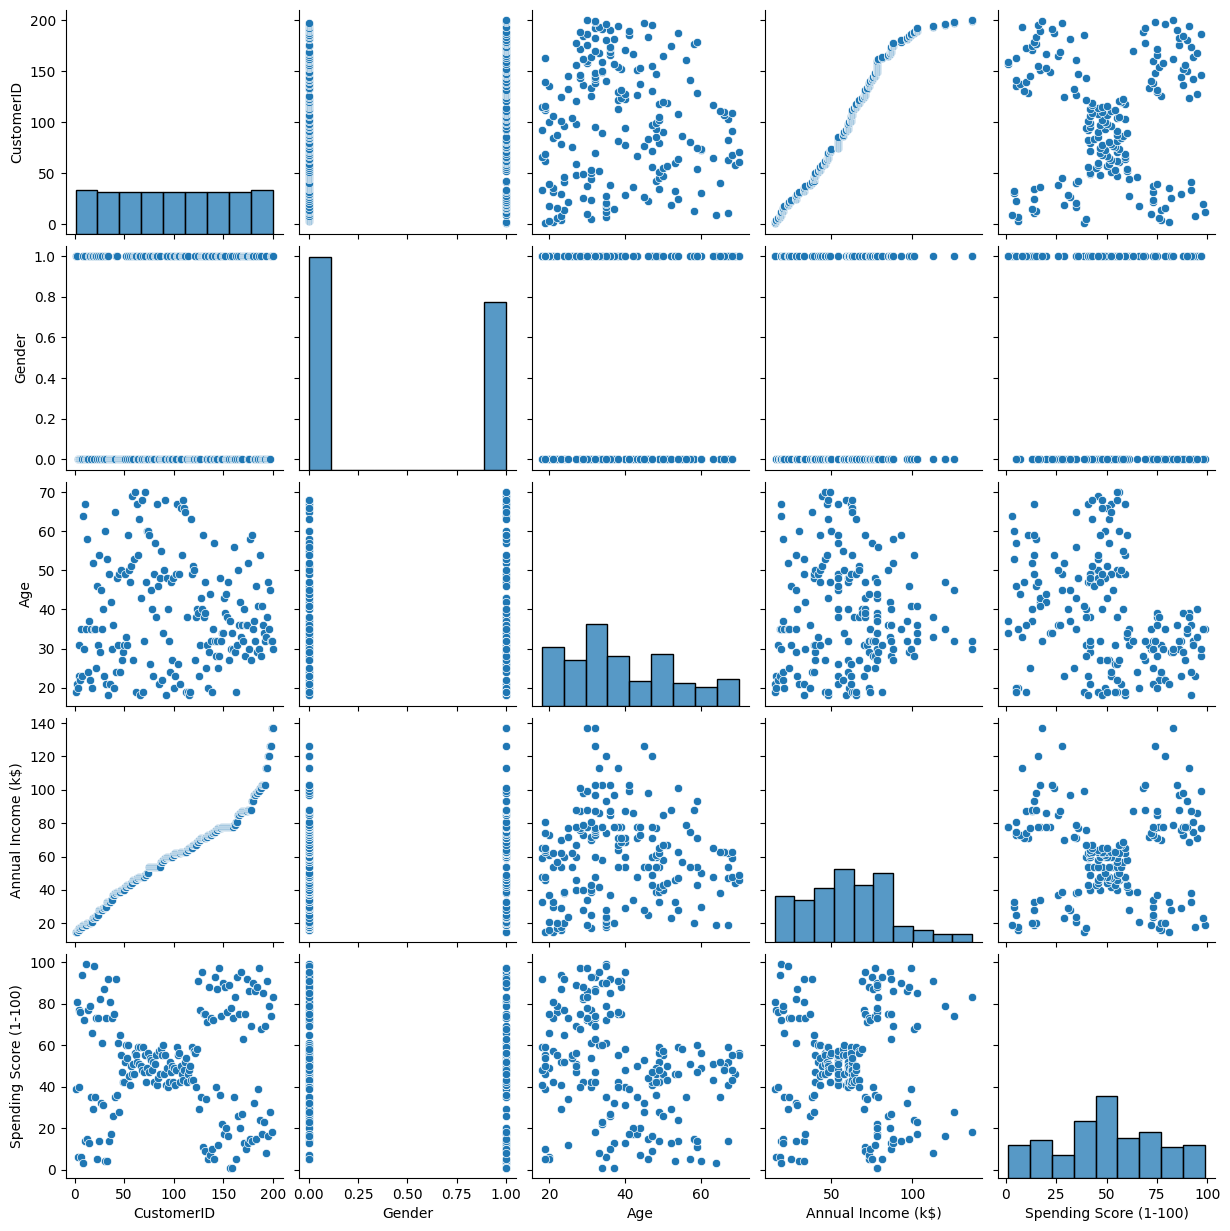

In [ ]:
sns.pairplot(df)

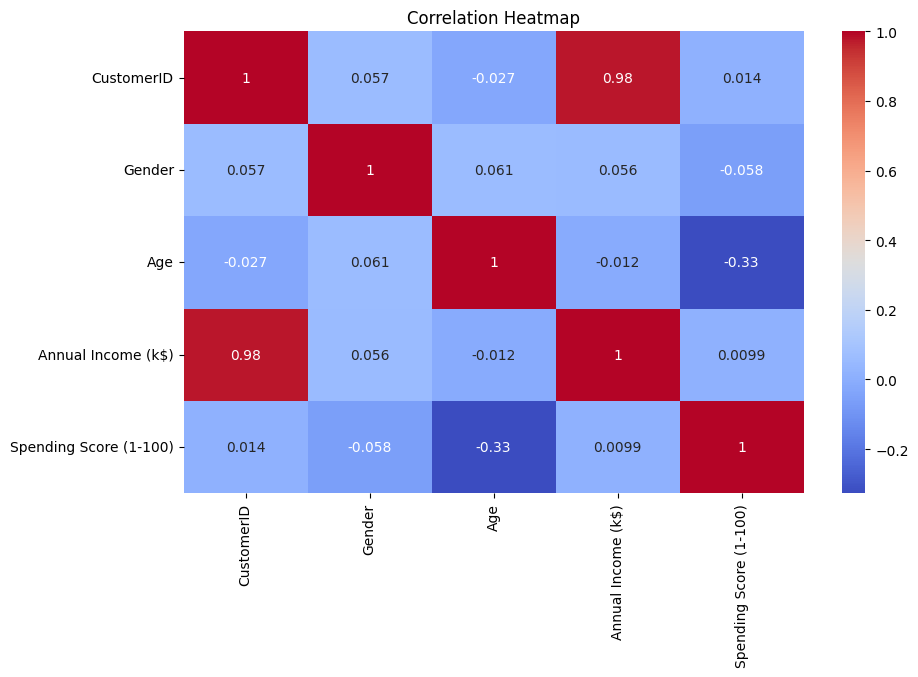

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

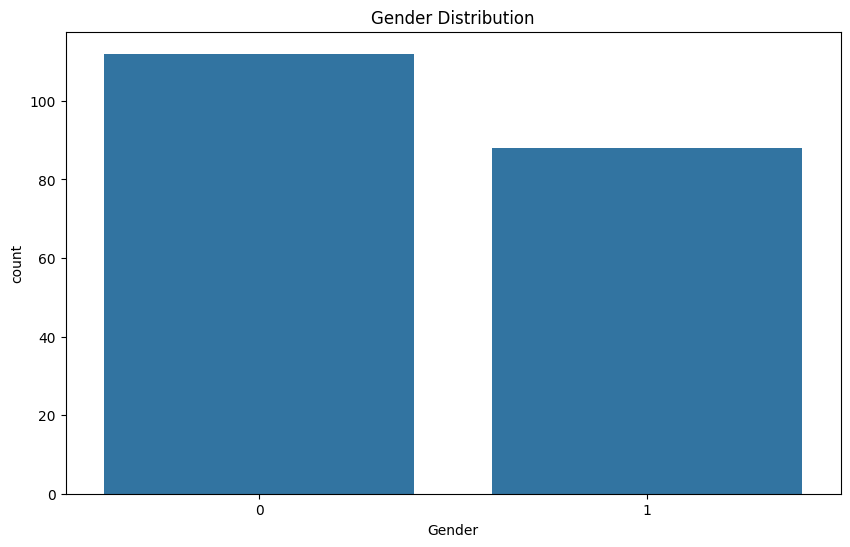

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

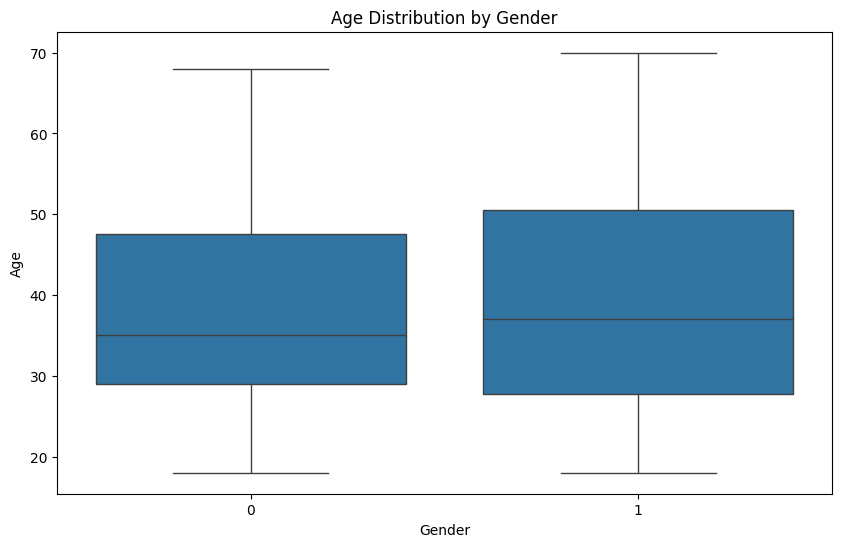

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.show()

<Axes: >

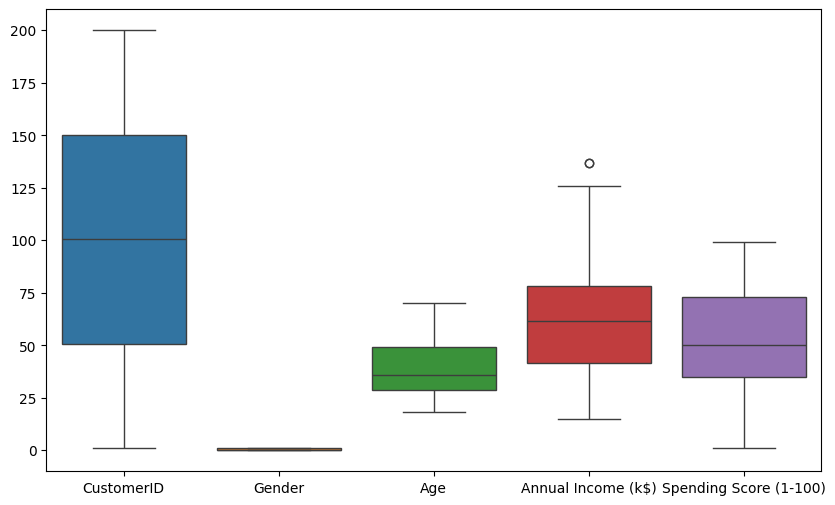

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df)

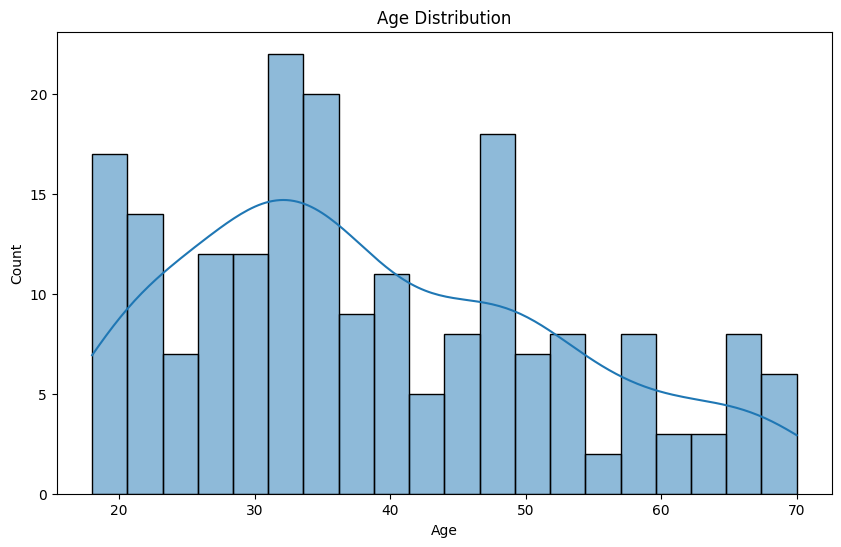

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

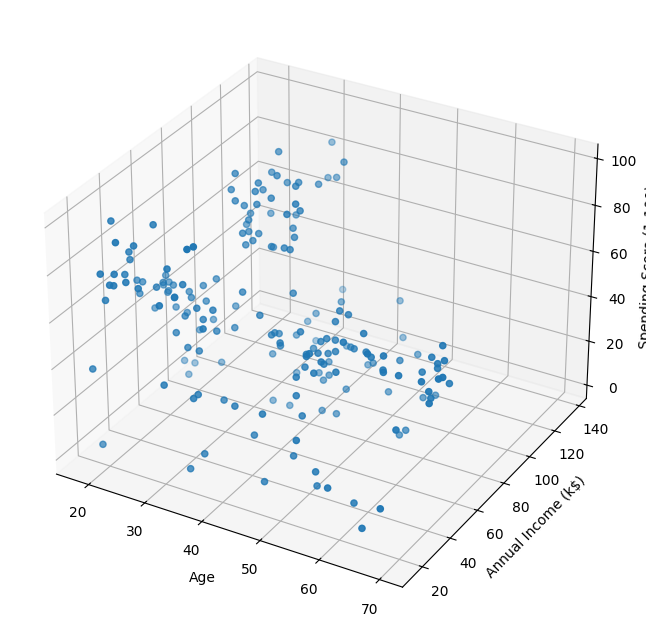

In [ ]:
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Text(0, 0.5, 'Principal Component 2')

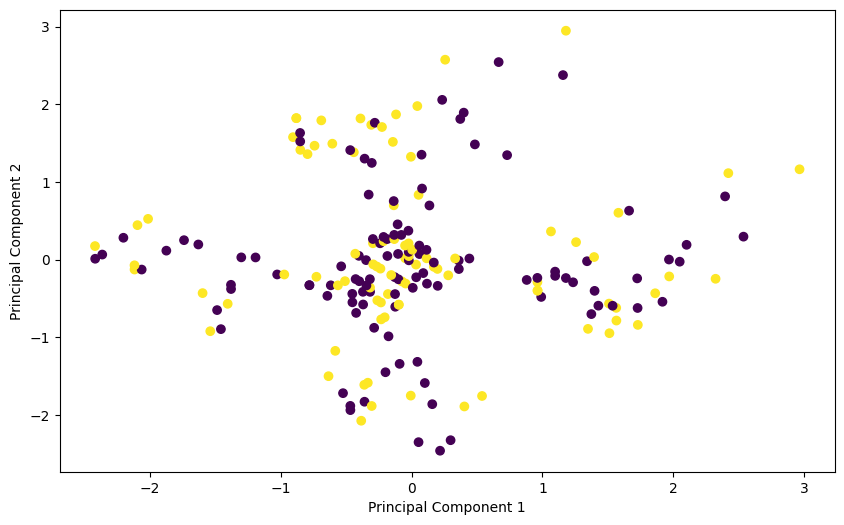

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

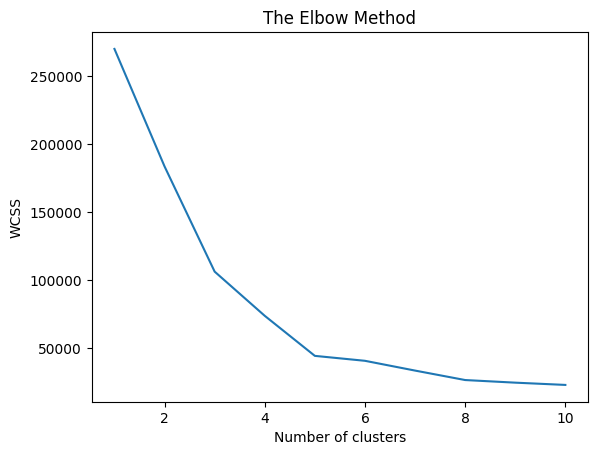

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhoutte_val = silhouette_score(X, kmeans.labels_)
print(silhoutte_val)

0.4426214845978157


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.575


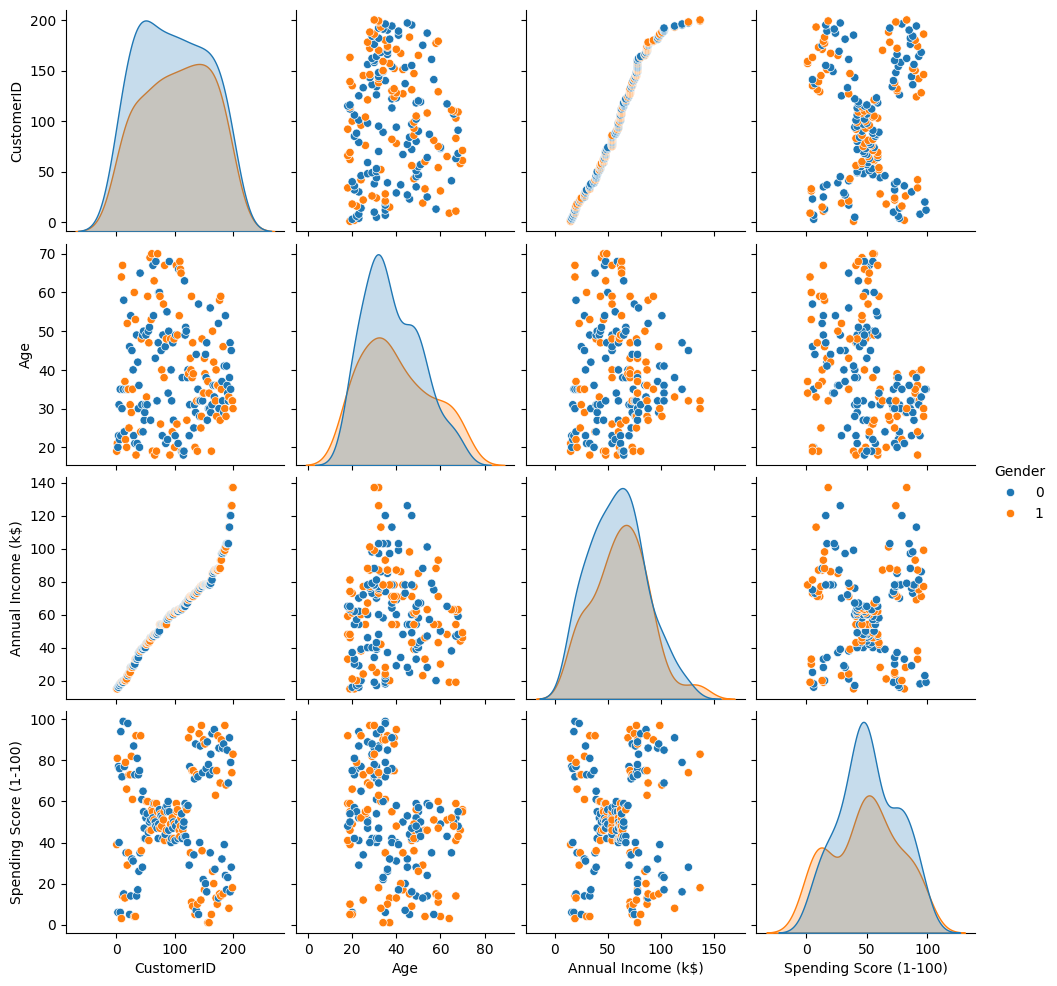

In [ ]:
sns.pairplot(df, hue='Gender')



<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

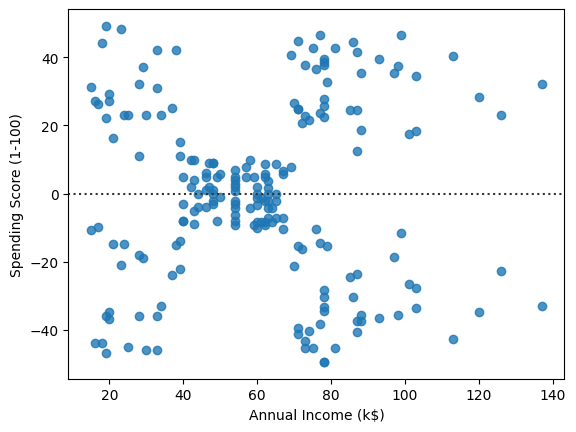

In [ ]:
sns.residplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)


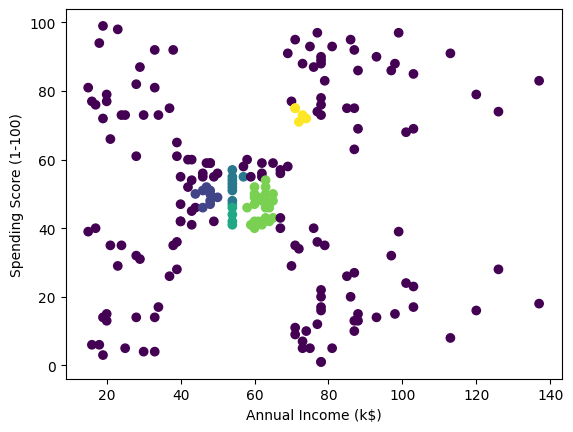

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Accuracy: 0.9666666666666667
Mean Squared Error: 0.03333333333333333


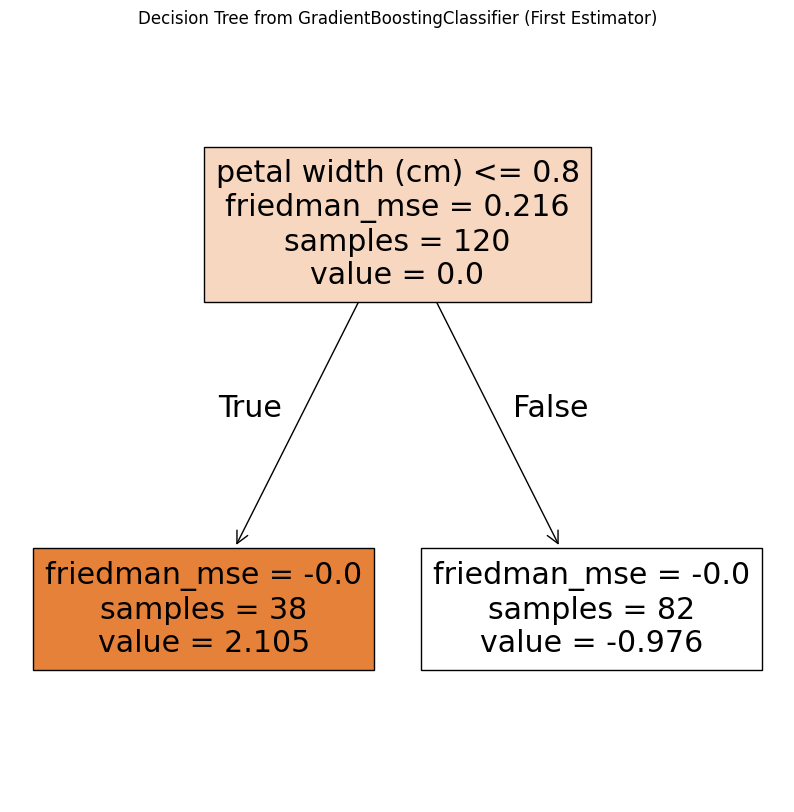

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree # Import plot_tree from sklearn.tree


SEED = 23

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
gbc = GradientBoostingClassifier(random_state=SEED)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

mean_squared_error = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mean_squared_error)

# Correct way to plot a tree from GradientBoostingClassifier
plt.figure(figsize=(10, 10))
plot_tree(gbc.estimators_[0, 0], filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)
plt.title('Decision Tree from GradientBoostingClassifier (First Estimator)')
plt.show()

Accuracy: 0.9666666666666667


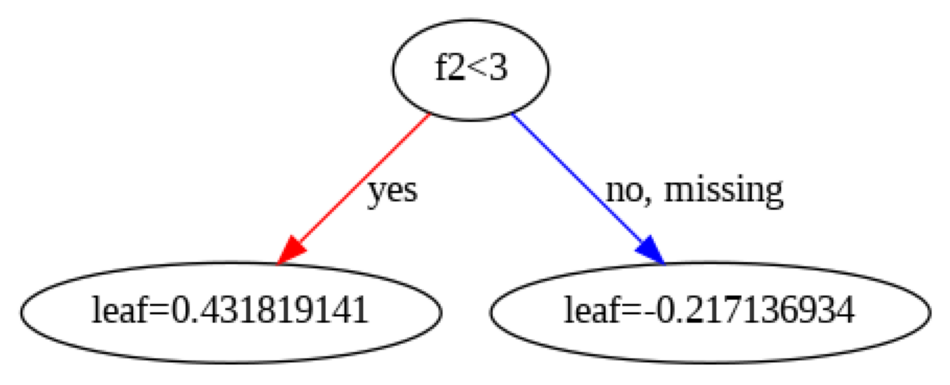

In [ ]:
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt # Import matplotlib for plotting utilities

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Correct way to plot a tree from XGBoost
fig, ax = plt.subplots(figsize=(12, 12)) # Create a figure and an axis for the plot
plot_tree(xgb, tree_idx=0, ax=ax) # Plot the first tree (index 0), using tree_idx instead of num_trees
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.149906
[LightGBM] [Info] Start training from score -1.049822
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


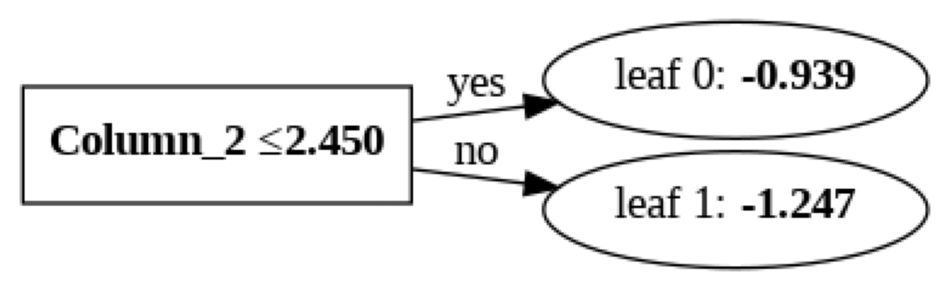

In [ ]:
import lightgbm as lgb
from lightgbm import plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tree_index = 0
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(lgbm, tree_index=tree_index, ax=ax)
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00
Learning rate set to 0.071017
0:	learn: 1.0161878	total: 52.5ms	remaining: 52.5s
1:	learn: 0.9438989	total: 57.3ms	remaining: 28.6s
2:	learn: 0.8813615	total: 64.1ms	remaining: 21.3s
3:	learn: 0.8199447	total: 64.9ms	remaining: 16.2s
4:	learn: 0.7733385	total: 65.6ms	remaining: 13s
5:	learn: 0.7214177	total: 73.7ms	remaining: 12.2s
6:	learn: 0.6875951	total: 74.5ms	remaining: 10.6s
7:	learn: 0.6471248	total: 75.2ms	remaining: 9.32s
8:	learn: 0.6080942	total: 75.9ms	remaining: 8.36s
9:	learn: 0.5741869	total: 76.8ms	remaining: 7.6s
10:	learn: 0.5480299	total: 88.3ms	remaining: 7.94s
11:	learn: 0.5243305	total: 89.2ms	remaining: 7.34s
12:	learn: 0.4988645	total: 89.4ms	remaining: 6.79s
13:	learn: 0.4766989	total: 90.1ms	remaining: 6.34s
14:	learn: 0.4598820	total: 97.9ms	remaining: 6.43s
15:	learn: 0.4384986	total: 98.7ms	remaining: 6.07s
16:	learn: 0.4177231	total: 99.4ms	remaining: 5.75s
17:	learn: 0.3987282	

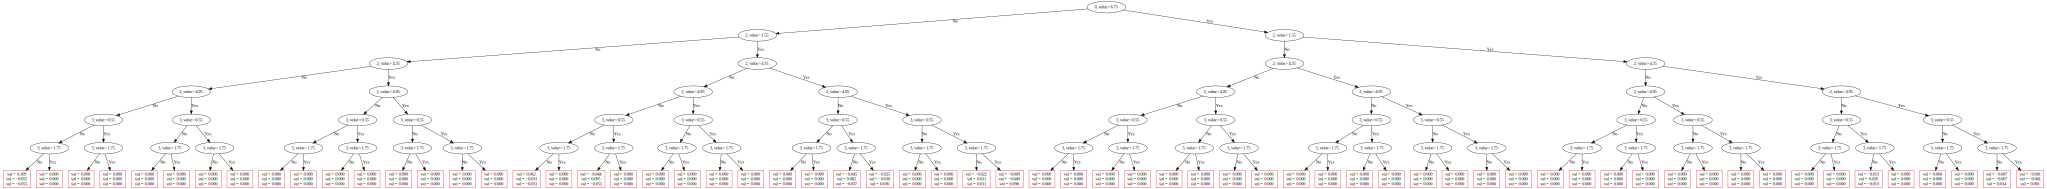

In [ ]:
!pip install catboost
import catboost as cb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

cat = cb.CatBoostClassifier()
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Correct way to plot a tree from CatBoost
cat.plot_tree(tree_idx=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9666666666666667


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(dt, X, y, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Mean cross-validation score: 0.9600000000000002


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_score = grid_search.best_score_
print("Best score:", best_score)

Best parameters: {'max_depth': None, 'n_estimators': 100}
Best score: 0.95


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {'n_estimators': randint(100, 500), 'max_depth': randint(1, 20)}
random_search = RandomizedSearchCV(RandomForestClassifier(), param_dist, cv=5)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best parameters:", best_params)
best_score = random_search.best_score_
print("Best score:", best_score)


Best parameters: {'max_depth': 2, 'n_estimators': 405}
Best score: 0.9583333333333334


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'C': 100, 'gamma': 0.01}


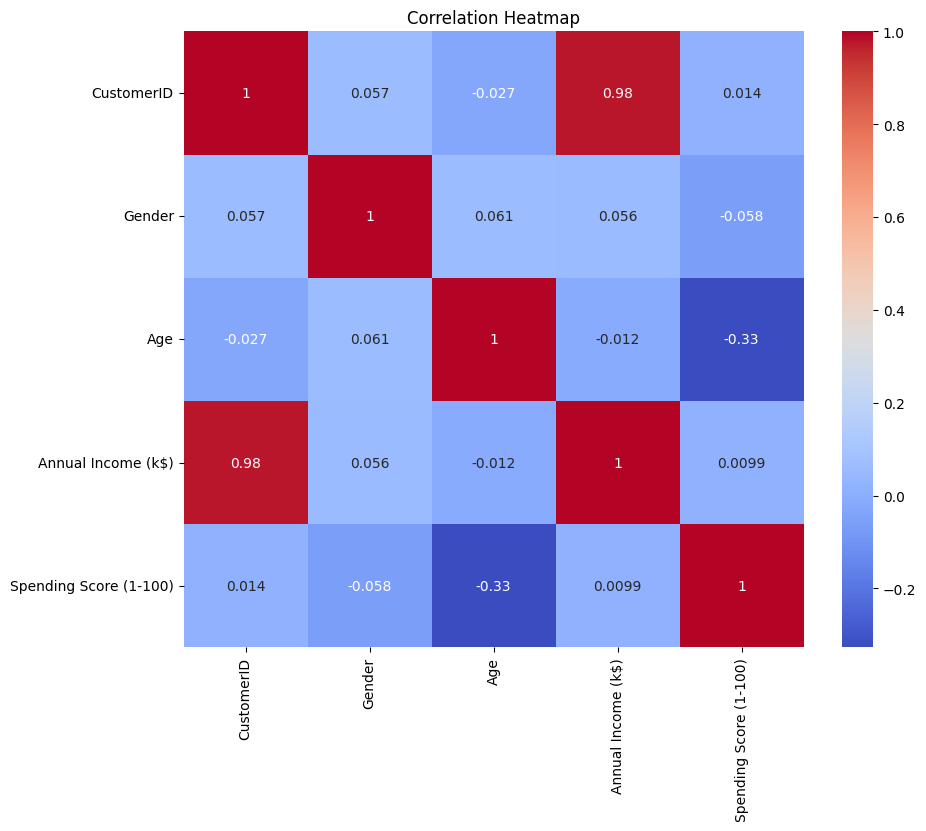

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/tmp/ipython-input-226238016.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins=20, kde=True)


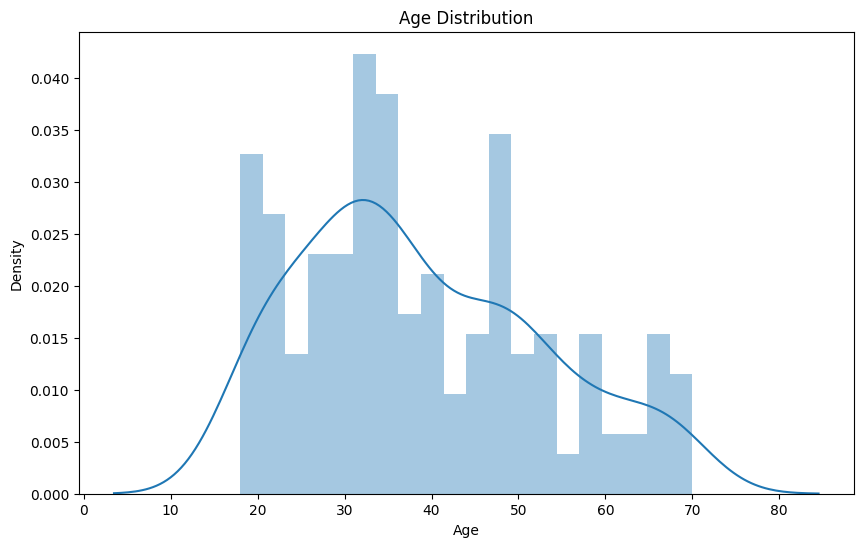

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

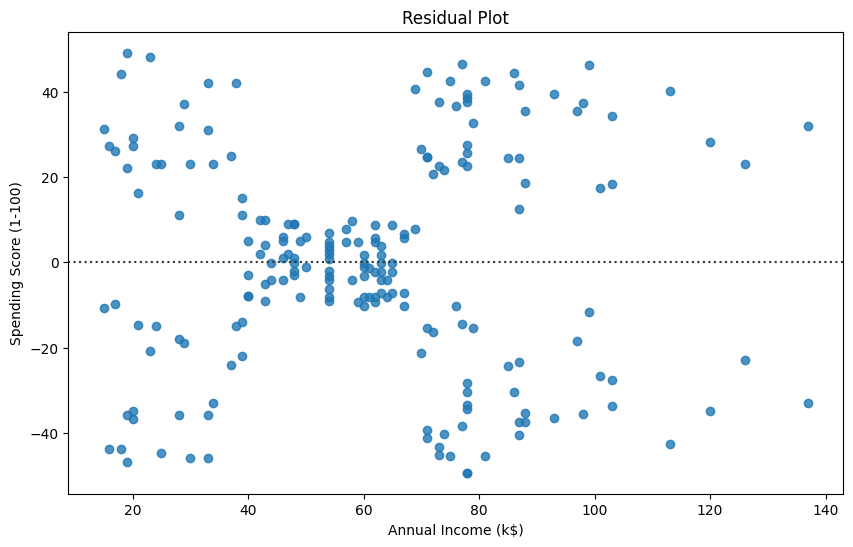

In [ ]:
plt.figure(figsize=(10, 6))
sns.residplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Residual Plot')
plt.show()